In [1]:
library(rtweet)
suppressPackageStartupMessages(library(tidyverse))

Warning message:
"package 'rtweet' was built under R version 3.4.3"Warning message:
"package 'tidyverse' was built under R version 3.4.3"Warning message:
"package 'tibble' was built under R version 3.4.3"Warning message:
"package 'tidyr' was built under R version 3.4.3"Warning message:
"package 'purrr' was built under R version 3.4.3"Warning message:
"package 'dplyr' was built under R version 3.4.2"

In [3]:
#Use the statuses/sample API to stream a "random sample" of tweets 
st1 <- stream_tweets(timeout = 60 * 1)

Streaming tweets for 60 seconds...


Downloading: 3.2 MB     

Finished streaming tweets!
opening file input connection.


 Imported 1980 records. Simplifying...


closing file input connection.


In [4]:
## i went to : https://www.google.com/search?q=language+translation 
## and translated the word "the" into the following languages:
## arabic, chinese, finnish, french, german, hindi, indonesian, japanese, mongolian, portugese, russian, spanish
qthe <- "و,和,ja,the,et,und,तथा,dan,そして,e,과,болон,e,а также,ve,y"

## i wanted to find a way to search for spaces. the plus sign operates like a space, so i figured I'd try
## something weird like this
qpunct <- "+-,+.,+ "

## enter qthe or qpunct in the first argument below
st2 <- stream_tweets(qthe, timeout = 60 * 1)

Streaming tweets for 60 seconds...


Downloading: 4.7 MB     

Finished streaming tweets!
opening file input connection.


 Imported 2928 records. Simplifying...


closing file input connection.


In [5]:
st3 <- stream_tweets(lookup_coords("world"), timeout = 60 * 1)

Streaming tweets for 60 seconds...


Downloading: 3.6 MB     

Finished streaming tweets!
opening file input connection.


 Imported 2685 records. Simplifying...


closing file input connection.


In [6]:
## function to join
join_rtweet <- function(x) {
    users <- users_data(x)
    users <- users[, names(users) != "screen_name"]
    users <- users[!duplicated(users$user_id), ]
    dplyr::left_join(x, users, by = "user_id")
}

## merge tweets and users data for each
st1 <- join_rtweet(st1)
st2 <- join_rtweet(st2)
st3 <- join_rtweet(st3)

In [7]:
head(st1, 1)

status_id,created_at,user_id,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
962810242663964672,2018-02-11 22:07:04,1255191367,aveprofetica,"RT @Tuitiritero_10: L@s gord@s tienen un gran dilema político, votar por Petro y entrar en dieta estricta y obligatoria durante su gobierno…",Twitter for iPhone,NA,NA,NA,FALSE,...,28028,7605,2013-03-09 19:26:13,FALSE,NA,NA,es,https://pbs.twimg.com/profile_banners/1255191367/1375739377,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/898530786596372480/9eN801Ii_normal.jpg


In [8]:
head(st2, 1)

status_id,created_at,user_id,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
962810518728617984,2018-02-11 22:08:10,882396571861569536,GrandmaM16,"RT @AriFleischer: Reuters/CNN/ABC don’t have bureaus in NoKorea, but their fawning coverage of NK reminds me of how CNN sucked up to Saddam…",Twitter for iPhone,NA,NA,NA,FALSE,...,24694,40952,2017-07-05 00:31:51,FALSE,NA,NA,en,https://pbs.twimg.com/profile_banners/882396571861569536/1511584631,,http://pbs.twimg.com/profile_images/905711282828959745/2HO4gaT4_normal.jpg


In [9]:
head(st3, 1)

status_id,created_at,user_id,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
962810803232690177,2018-02-11 22:09:18,1273313982,iridian_davine,<f0><U+009F><U+0098><U+00A2><f0><U+009F><U+0098><U+00A2><f0><U+009F><U+0098><U+00AA><f0><U+009F><U+0092><U+0094>,Twitter for iPhone,NA,NA,NA,FALSE,...,4982,3854,2013-03-16 21:18:06,FALSE,NA,NA,en,https://pbs.twimg.com/profile_banners/1273313982/1497917308,http://pbs.twimg.com/profile_background_images/378800000041062507/f1035b66df028de1421e7d8313b0ad19.jpeg,http://pbs.twimg.com/profile_images/958444194904801280/0g635GGk_normal.jpg


In [10]:
## create stream_method variable
st1$stream_method <- "statuses/sample"
st2$stream_method <- "statuses/filter/track"
st3$stream_method <- "statuses/filter/locations"

## bind by row all three data sets
st <- rbind(st1, st2, st3)

Extract the following features as numeric variables (use names in parentheses when provided):
* account_created_at
* is_retweet
* is_quote
* is_reply (reply_to_status_id)
* is_verified (verified)
* tweet_chars (text)
* bio_chars (description)
* hashtags (hashtags),
* mentions (mentions_user_id)
* medias (ext_media_url)
* lang_en (lang)
* lang_pt (lang)
* lang_es (lang)
* lang_ja (lang)
* lang_other (lang)

In [11]:
## create function to count number of hashtags, media attachments, and mentions
count_elems <- function(x) {
    sapply(x, function(x) {
        ifelse(length(x) == 0L || (length(x) == 1L && is.na(x)), 
               0L, length(x))
    })
}

## hint: Twitter uses language ISO codes and these are a few of the popular languages. for our purposes,
## including english/not-english, would work to illustrate whether we are disproportionately sampling 
## from english tweets

## extract and convert features to numeric
st_features <- st %>%
    mutate(
        account_created_at = as.numeric(account_created_at),
        ## I converted the account creation date to years from the oldest account's origin date
        account_created_at = (max(account_created_at) - account_created_at) / (60 * 60 * 24 * 365),
        is_retweet = as.integer(is_retweet),
        is_quote = as.integer(is_quote),
        is_reply = as.integer(!is.na(reply_to_status_id)),
        is_verified = as.integer(verified),
        tweet_chars = stringi::stri_width(text),
        bio_chars = ifelse(is.na(description), 0L, stringi::stri_width(description)),
        hashtags = count_elems(hashtags),
        mentions = count_elems(mentions_user_id),
        medias = count_elems(ext_media_url),
        lang_en = as.integer(lang == "en"),
        lang_pt = as.integer(lang == "pt"),
        lang_es = as.integer(lang == "es"),
        lang_ja = as.integer(lang == "ja"),
        lang_other = as.integer(!lang %in% c("en", "pt", "es", "ja"))) %>%
    mutate_if(is.integer, as.numeric) %>%
    select(stream_method, account_created_at, is_retweet, is_quote, is_reply,
           is_verified, tweet_chars, bio_chars, hashtags, mentions, medias, lang_en:lang_other)

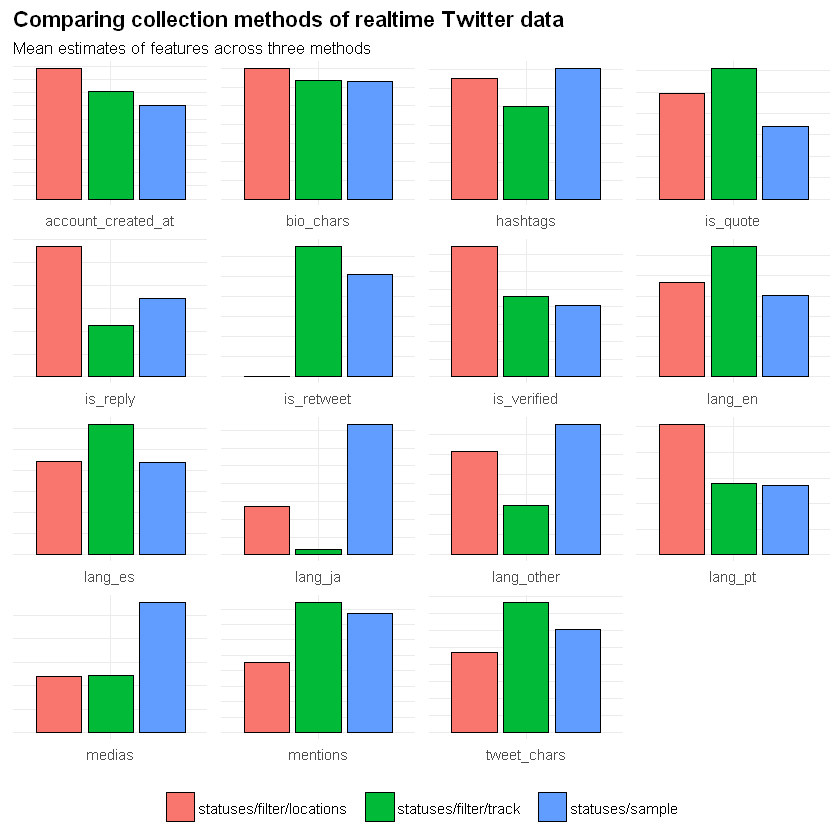

In [12]:
## group, summarise, and then plot
st_features %>%
    group_by(stream_method) %>%
    summarise_if(is.numeric, mean) %>%
    gather(var, mean, -stream_method) %>%
    ggplot(aes(x = var, y = mean, fill = stream_method)) + 
    geom_col(size = .1, colour = "black", width = .7, 
             position = position_dodge(width = .8)) + 
    theme_minimal() + 
    facet_wrap( ~ var, scales = "free", ncol = 4) + 
    theme(plot.title = element_text(face = "bold"),
          legend.position = "bottom", 
          axis.text.y = element_blank(),
          legend.title = element_blank(),
          strip.text = element_blank()) + 
    labs(title = "Comparing collection methods of realtime Twitter data",
        subtitle = "Mean estimates of features across three methods",
        x = NULL, y = NULL)